In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the studentInfo dataset
stu_info = pd.read_csv("studentInfo.csv")

stu_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [3]:
# showing how many rows and how many columns are in the dataset
print(stu_info.shape)

(32593, 12)


In [4]:
# information summary of our dataframe (including data type for all variables)
stu_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
#counting unique attributes (id_student is a monotonous attribute, but we will need it later to merge tables)
stu_info.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [6]:
# descrriptive statistics for numerical data (id_student gives us no information; maximums of num_of_prev_attempts and studied_credits are really high - possible outliers)
stu_info.describe ()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [7]:
# checking for missing data
stu_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [8]:
# deleting the missing values
stu_info_cleaned = stu_info.dropna(subset=['imd_band'])

In [9]:
#calculating the percentage of people who have withdrawn and printing the result with 2 digits after the decimal point
result_counts = stu_info_cleaned['final_result'].value_counts()
withdrawn_perc = (result_counts.get('Withdrawn', 0) / len(stu_info_cleaned)) * 100
print(f"Percentage of students who have withdrawn: {withdrawn_perc:.2f}%")

Percentage of students who have withdrawn: 31.51%


In [10]:
# excluding withdrawn students from the analysis (as they did in the paper)
withdrawn_students = stu_info_cleaned[stu_info_cleaned['final_result'] == 'Withdrawn']
stu_info_cleaned = stu_info_cleaned.drop(withdrawn_students.index)
stu_info_cleaned

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


Number of students who passed: 14655
Number of students who failed: 6907


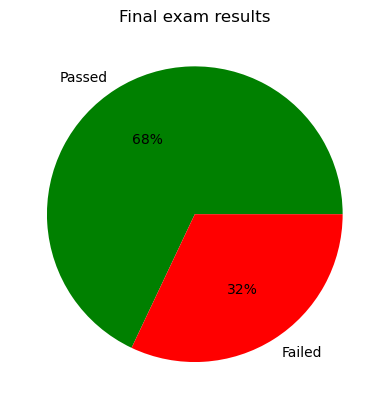

In [11]:
#replacing value 'Distinction' with Pass'
stu_info_cleaned['final_result'] = stu_info_cleaned['final_result'].replace('Distinction', 'Pass')
#counting how many students have failed and passed and printing the results
result_counts = stu_info_cleaned['final_result'].value_counts()
passed = result_counts.get('Pass', 0)
failed = result_counts.get('Fail', 0)
#printing the results
print(f"Number of students who passed: {passed}")
print(f"Number of students who failed: {failed}")

#creating a pie chart to show the results
percent = (result_counts / len(stu_info_cleaned)) * 100
plt.pie(percent, labels=['Passed', 'Failed'], colors=['green', 'red'], autopct='%1.0f%%')
plt.title ('Final exam results')
# displaying the pie chart
plt.show()

Text(0.5, 1.0, 'Distribution of Final Results by Highest Education')

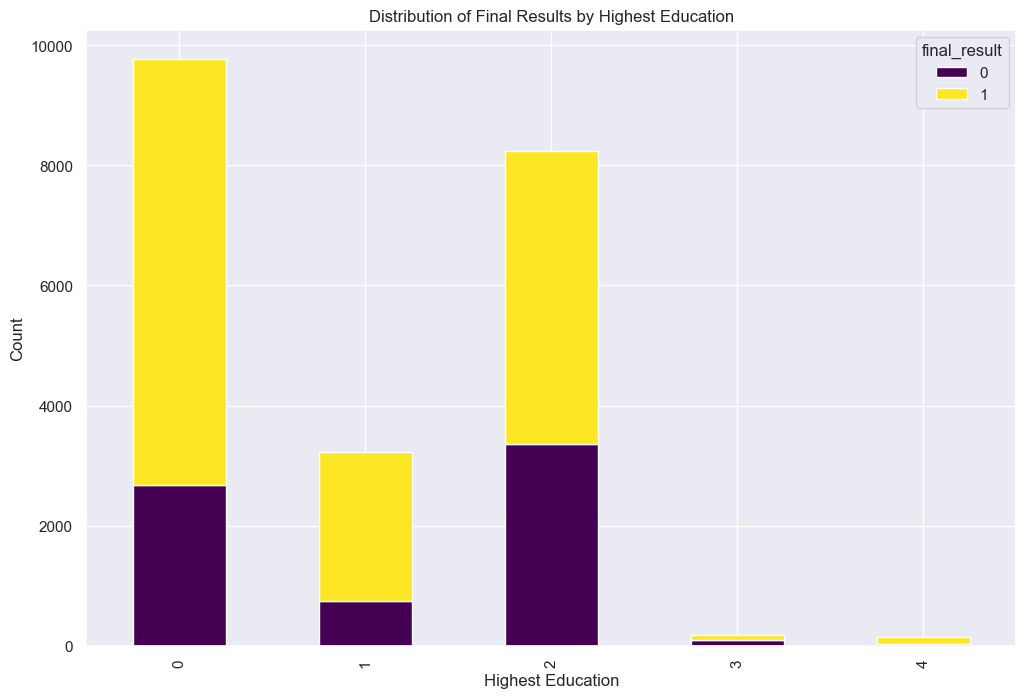

In [48]:
#showing the distribution of the final results based on education level
cross_tab = pd.crosstab(stu_info_cleaned['highest_education'], stu_info_cleaned['final_result'])

cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# adding labels and title
plt.xlabel('Highest Education')
plt.ylabel('Count')
plt.title('Distribution of Final Results by Highest Education')

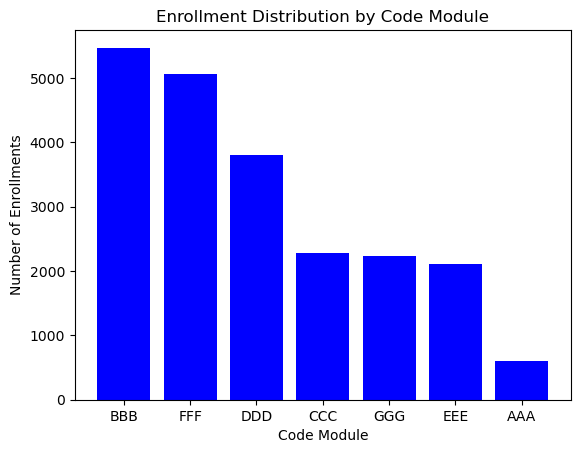

In [12]:
# showing how many people enrolled in different course module using histogram
code_module_counts = stu_info_cleaned['code_module'].value_counts()
# counting different code modules and their values
code_modules = code_module_counts.index
counts = code_module_counts.values

# plotting the histogram and adding labels and title
plt.bar(code_modules, counts, color='blue')
plt.xlabel('Code Module')
plt.ylabel('Number of Enrollments')
plt.title('Enrollment Distribution by Code Module')
# displaying the histogram
plt.show()

In [13]:
# replacing categorical values with integer values using label encoder
columns_to_labelencode=['code_module', 'code_presentation',	'id_student',	'gender',	'region',	'highest_education',	'imd_band',	'age_band',	'num_of_prev_attempts',	'studied_credits',	'disability',	'final_result']
label_encoder = LabelEncoder()
for column in columns_to_labelencode:
    stu_info_cleaned[column] = label_encoder.fit_transform(stu_info_cleaned[column])
print(stu_info_cleaned.info())

stu_info_cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 21562 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_module           21562 non-null  int32
 1   code_presentation     21562 non-null  int32
 2   id_student            21562 non-null  int64
 3   gender                21562 non-null  int32
 4   region                21562 non-null  int32
 5   highest_education     21562 non-null  int32
 6   imd_band              21562 non-null  int32
 7   age_band              21562 non-null  int32
 8   num_of_prev_attempts  21562 non-null  int64
 9   studied_credits       21562 non-null  int64
 10  disability            21562 non-null  int32
 11  final_result          21562 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 1.4 MB
None


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,1,1,1,0,1,9,2,0,35,0,1
1,0,1,27,0,6,1,2,1,0,5,0,1
3,0,1,52,0,7,0,5,1,0,5,0,1
4,0,1,57,0,11,2,5,0,0,5,0,1
5,0,1,81,1,10,0,8,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32587,6,3,20034,0,6,0,8,0,0,0,1,1
32588,6,3,20097,0,10,2,1,0,0,0,0,0
32589,6,3,20125,0,0,2,4,1,0,0,0,1
32590,6,3,20135,0,8,0,2,0,0,0,1,1


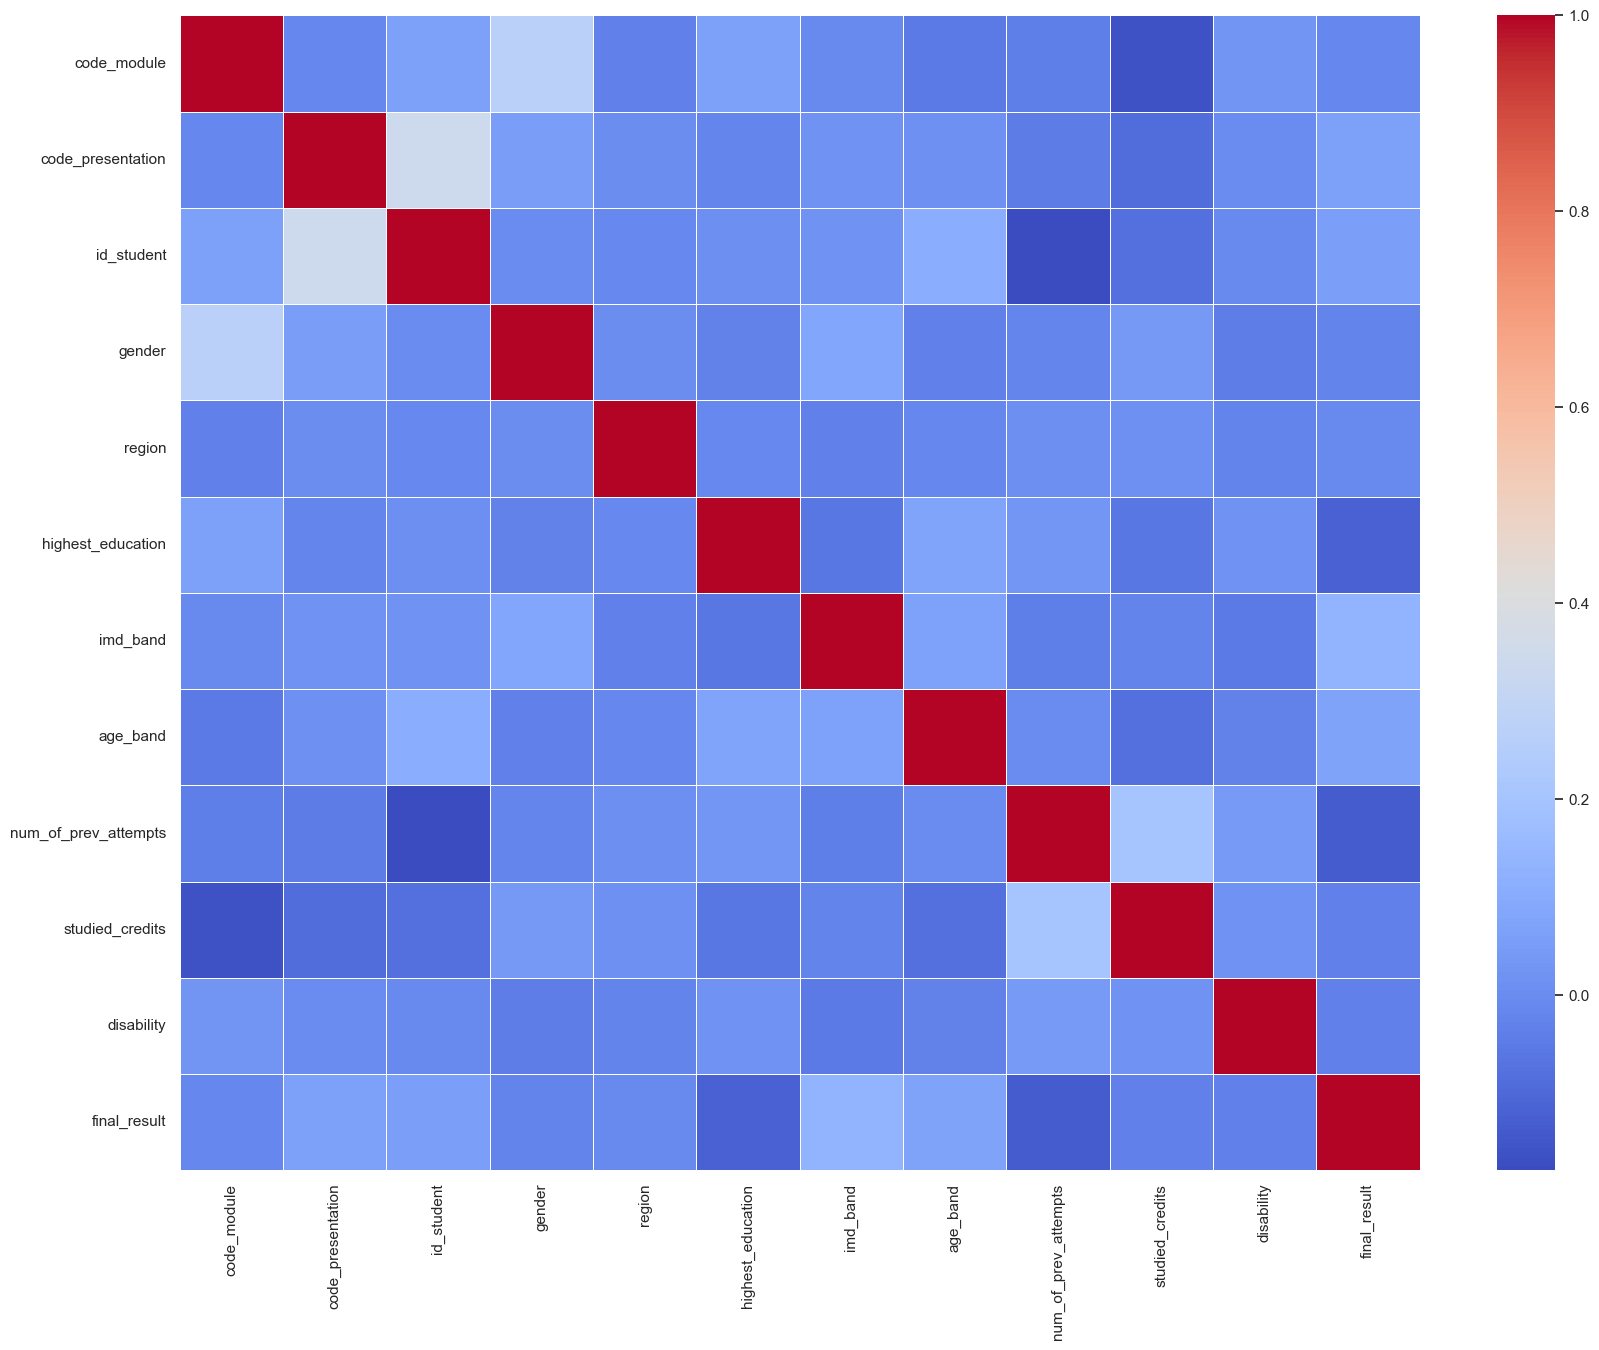

In [49]:
# creating a heatmap to show correlations between all variables (we can see our variables are not correlated)
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(stu_info_cleaned.corr(), cmap="coolwarm", linewidths=.5)
plt.show()

In [15]:
# loading the studentInfo dataset
stu_vle = pd.read_csv("studentVle.csv")

stu_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [16]:
# showing how many rows and how many columns are in the dataset
print(stu_vle.shape)

(10655280, 6)


In [17]:
# information summary of studentVle dataframe
stu_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [19]:
# checking for missing data
stu_vle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [20]:
# descriptive statistics for numerical data
stu_vle.describe ()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [21]:
#uploading the vle data
vle = pd.read_csv("Vle.csv")

vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [23]:
#merging vle dataframe with studentVle
vle_merge = pd.merge(vle, stu_vle, on=['code_module', 'code_presentation', 'id_site'], how='left')
vle_merge

,id_site,code_module,code_presentation,activity_type,week_from,week_to,id_student,date,sum_click
0,546943,AAA,2013J,resource,NaN,NaN,75091.0,-10.0,1.0
1,546943,AAA,2013J,resource,NaN,NaN,186149.0,-10.0,1.0
2,546943,AAA,2013J,resource,NaN,NaN,205350.0,-10.0,2.0
3,546943,AAA,2013J,resource,NaN,NaN,1626710.0,-9.0,1.0
4,546943,AAA,2013J,resource,NaN,NaN,2643002.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...
10655371,897100,GGG,2014J,resource,NaN,NaN,656053.0,1.0,1.0
10655372,897100,GGG,2014J,resource,NaN,NaN,688819.0,1.0,1.0
10655373,897100,GGG,2014J,resource,NaN,NaN,642694.0,15.0,1.0
10655374,897100,GGG,2014J,resource,NaN,NaN,639251.0,117.0,1.0


In [35]:
#checking for missing data
vle_merge.isna().sum()

id_site                    0
code_module                0
code_presentation          0
activity_type              0
week_from            9269640
week_to              9269640
id_student                96
date                      96
sum_click                 96
dtype: int64

In [36]:
#deleting columns week_from and week_to (too many missing data)
columns_to_drop = ['week_to', 'week_from']
vle_merge = vle_merge.drop(columns=columns_to_drop)

In [39]:
#deleting missing data from id_student, date and sum_click
vle_merge = vle_merge.dropna(subset=['id_student','date','sum_click'])

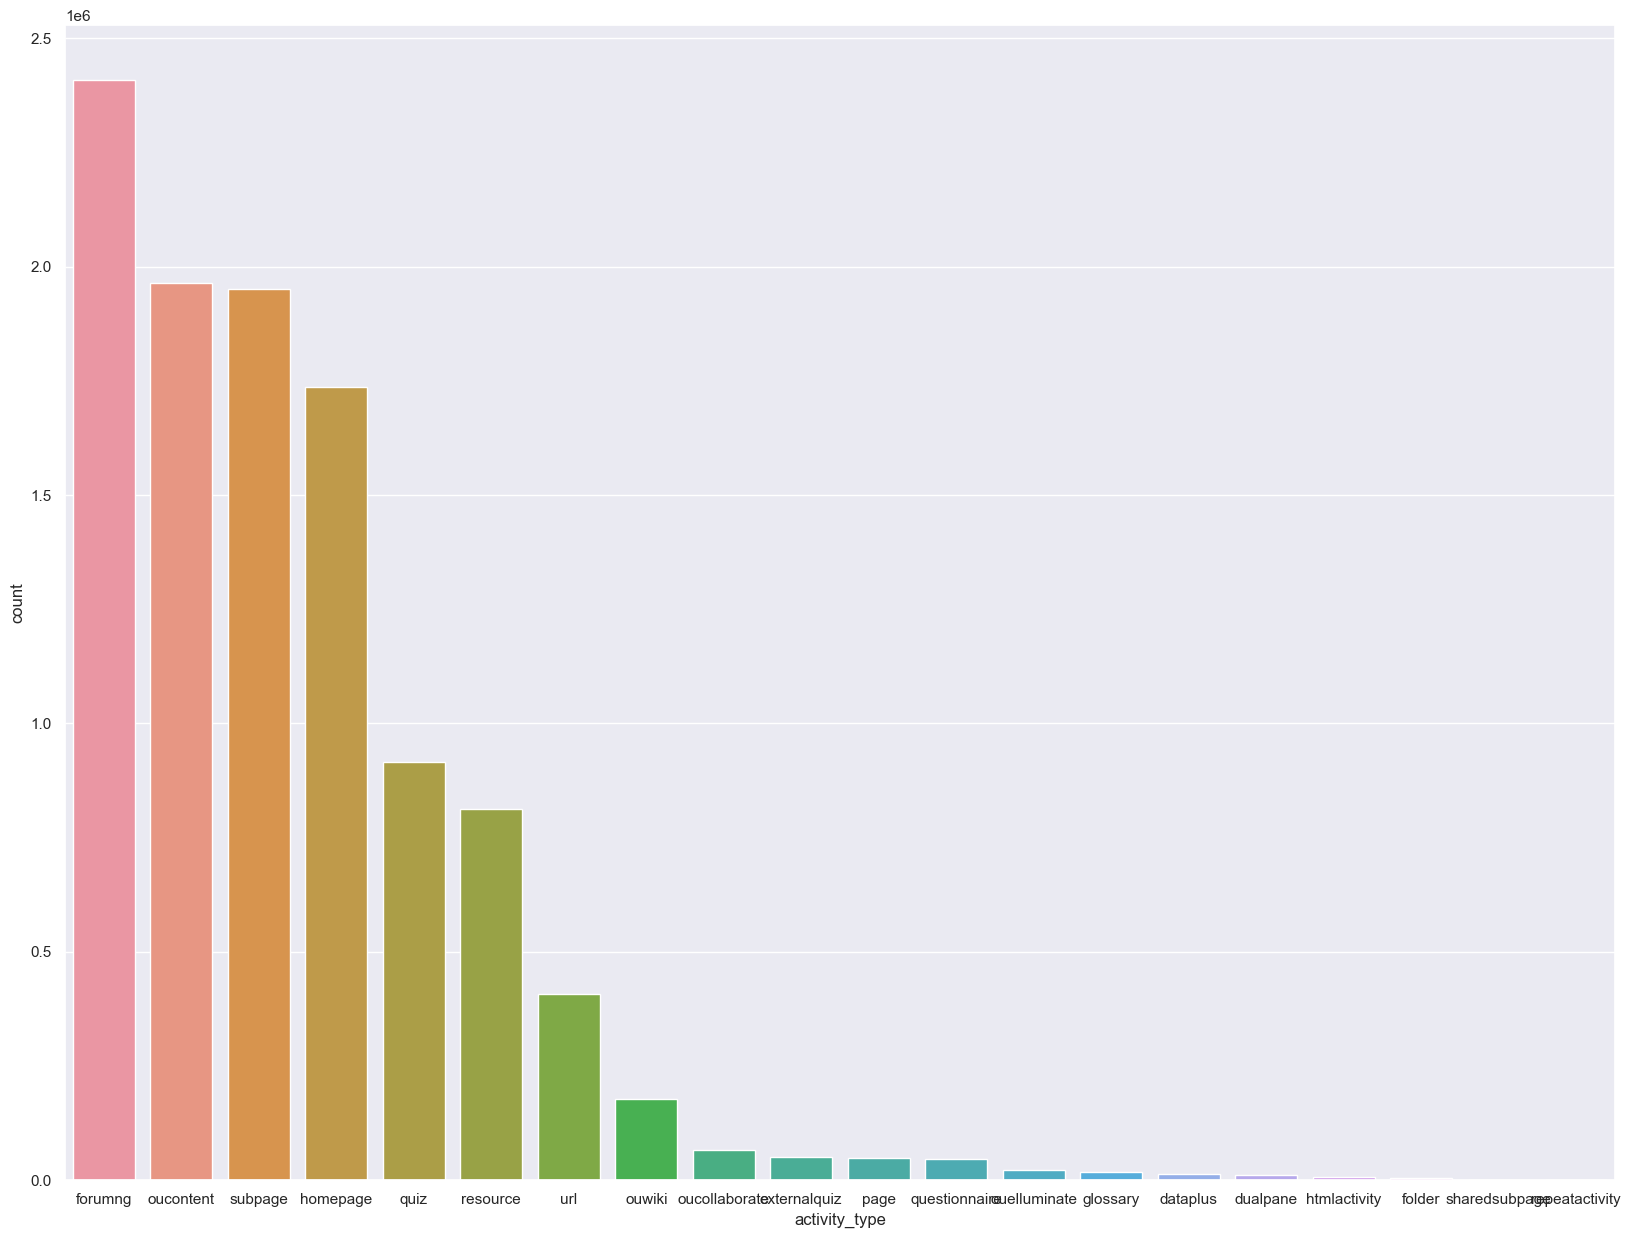

<Figure size 1500x500 with 0 Axes>

In [40]:
#seeing what type of activity in VLE is most common (ForumNG, oucontent, subpage and homepage)
sns.countplot(x='activity_type', data=vle_merge, order=vle_merge['activity_type'].value_counts().index)
plt.figure(figsize=(15, 5))
plt.show()